In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from qiskit.circuit.library import TwoLocal, EfficientSU2

import sys
sys.path.append('../utility')
from vqe_run import *
from qc_ansatze import *

# lambda = 2.0

this notebook is a copy of the lambda=0.2 notebook. Original 8 ansatze were used. 

In [2]:
Hpauli =[('IIIIII', 7.5),
  ('IIIIIZ', -0.5),
  ('IIIIZI', -0.5),
  ('IIIZII', -0.5),
  ('IIZIII', -0.5),
  ('IXXIXX', -0.5),
  ('IZIIII', -0.5),
  ('XIXXIX', -0.5),
  ('XXIXXI', -0.5),
  ('ZIIIII', -0.5)]

from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import NumPyEigensolver
H4q = SparsePauliOp.from_list(Hpauli)

# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q)
print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
E_exact

Exact Result of qubit hamiltonian: [4.26794919 5.09678807 5.09678807 5.09678807]


4.26795

# TwoLocal circuit ansatze

In [3]:
ansatz_0a_2f = TL_ansatz(H4q.num_qubits, 'ry', 'crx', "circular", 2)
ansatz_0b_2f = TL_ansatz(H4q.num_qubits, 'rz', 'crx', 'circular', 2)
ansatz_0c_2f = TL_ansatz(H4q.num_qubits, ['ry','rz'], 'crx', 'circular', 2)
ansatz_0d_2f = TL_ansatz(H4q.num_qubits,['ry','y'], 'crx', 'circular', 2)

ansatz_1a_2f =  TL_ansatz(H4q.num_qubits, 'ry', 'crx', "full", 2)
ansatz_1b_2f =  TL_ansatz(H4q.num_qubits, 'rz', 'crx', "full", 2)
ansatz_1c_2f =  TL_ansatz(H4q.num_qubits, ['ry','rz'], 'crx', "full", 2)
ansatz_1d_2f =  TL_ansatz(H4q.num_qubits, ['ry','y'], 'crx', "full", 2)

Circuit ansatz with 30 parameters
Circuit ansatz with 30 parameters
Circuit ansatz with 48 parameters
Circuit ansatz with 30 parameters
Circuit ansatz with 48 parameters
Circuit ansatz with 48 parameters
Circuit ansatz with 66 parameters
Circuit ansatz with 48 parameters


In [4]:
tl = [ansatz_0a_2f, ansatz_0b_2f, ansatz_0c_2f, ansatz_0d_2f,
     ansatz_1a_2f, ansatz_1b_2f, ansatz_1c_2f, ansatz_1d_2f]
tl_names = ['ansatz_0a_2f','ansatz_0b_2f','ansatz_0c_2f', 'ansatz_0d_2f',
     'ansatz_1a_2f','ansatz_1b_2f','ansatz_1c_2f', 'ansatz_1d_2f']

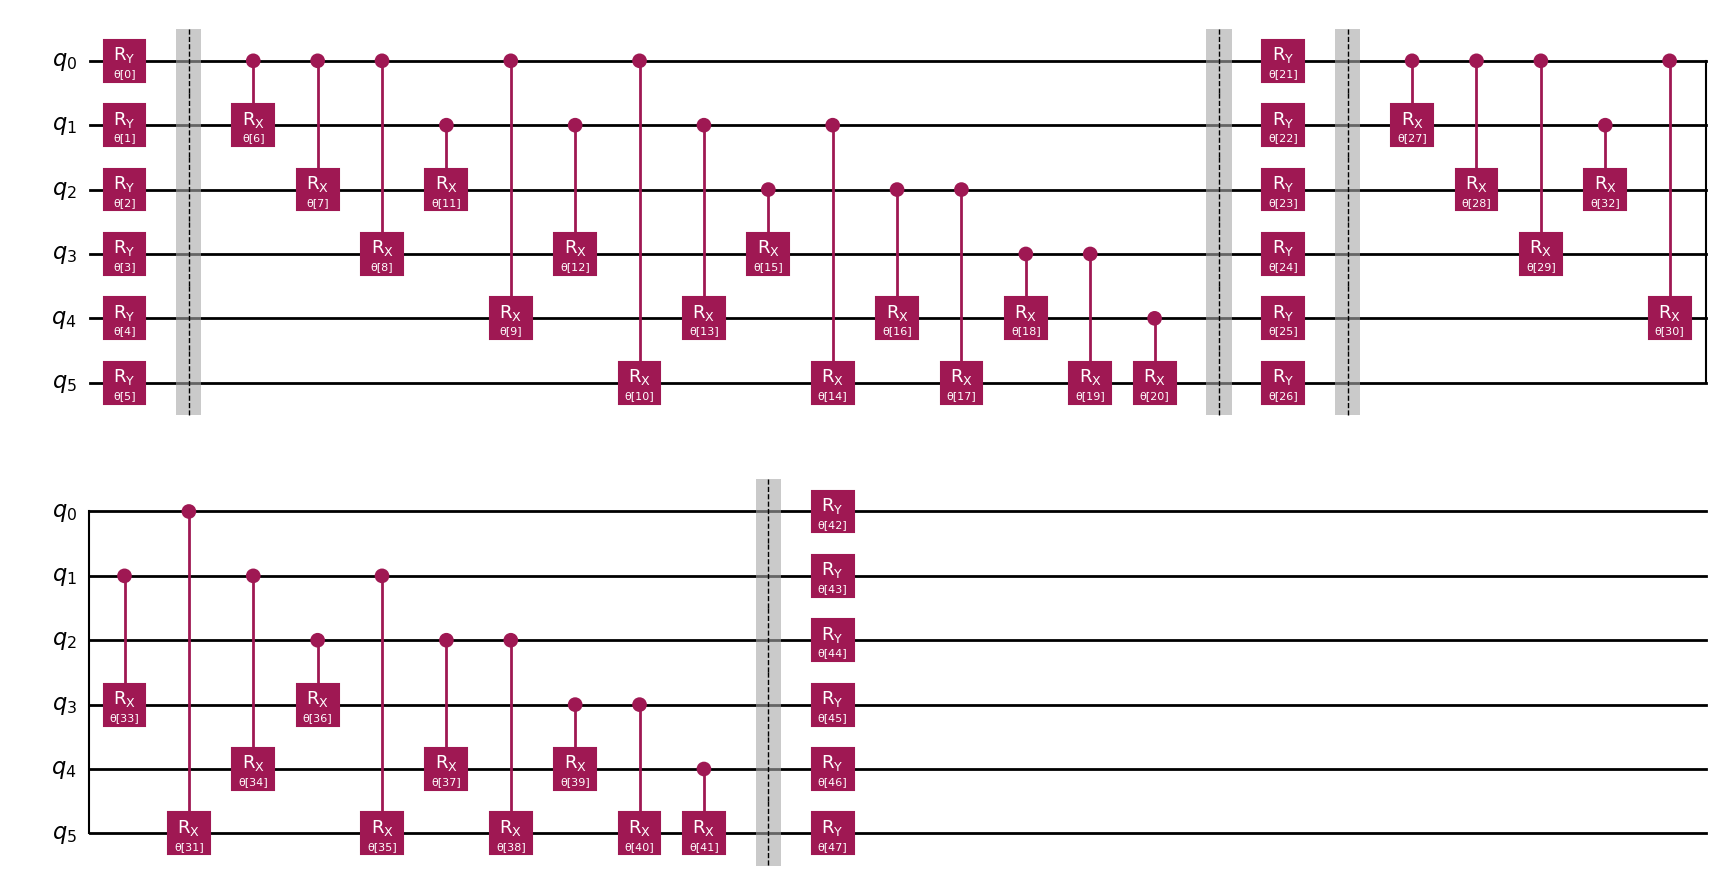

In [5]:
tl[4].decompose().draw(output='mpl')

# EfficientSU2

In [6]:
ansatz_0a_su2_2f = ef_ansatz(H4q.num_qubits, 'ry',  "circular", 2)
ansatz_0b_su2_2f = ef_ansatz(H4q.num_qubits, 'rz',  'circular', 2)
ansatz_0c_su2_2f = ef_ansatz(H4q.num_qubits, ['ry','rz'], 'circular', 2)
ansatz_0d_su2_2f = ef_ansatz(H4q.num_qubits,['ry','y'], 'circular', 2)

ansatz_1a_su2_2f =  ef_ansatz(H4q.num_qubits, 'ry',  "full", 2)
ansatz_1b_su2_2f =  ef_ansatz(H4q.num_qubits, 'rz',  "full", 2)
ansatz_1c_su2_2f =  ef_ansatz(H4q.num_qubits, ['ry','rz'], "full", 2)
ansatz_1d_su2_2f =  ef_ansatz(H4q.num_qubits, ['ry','y'],  "full", 2)

Circuit ansatz with 18 parameters
Circuit ansatz with 18 parameters
Circuit ansatz with 36 parameters
Circuit ansatz with 18 parameters
Circuit ansatz with 18 parameters
Circuit ansatz with 18 parameters
Circuit ansatz with 36 parameters
Circuit ansatz with 18 parameters


In [7]:
effsu2 = [ansatz_0a_su2_2f, ansatz_0b_su2_2f, ansatz_0c_su2_2f, ansatz_0d_su2_2f, 
          ansatz_1a_su2_2f, ansatz_1b_su2_2f, ansatz_1c_su2_2f, ansatz_1d_su2_2f]
effsu2_names = ['ansatz_0a_su2_2f', 'ansatz_0b_su2_2f', 'ansatz_0c_su2_2f','ansatz_0d_su2_2f', 
          'ansatz_1a_su2_2f', 'ansatz_1b_su2_2f', 'ansatz_1c_su2_2f', 'ansatz_1d_su2_2f']

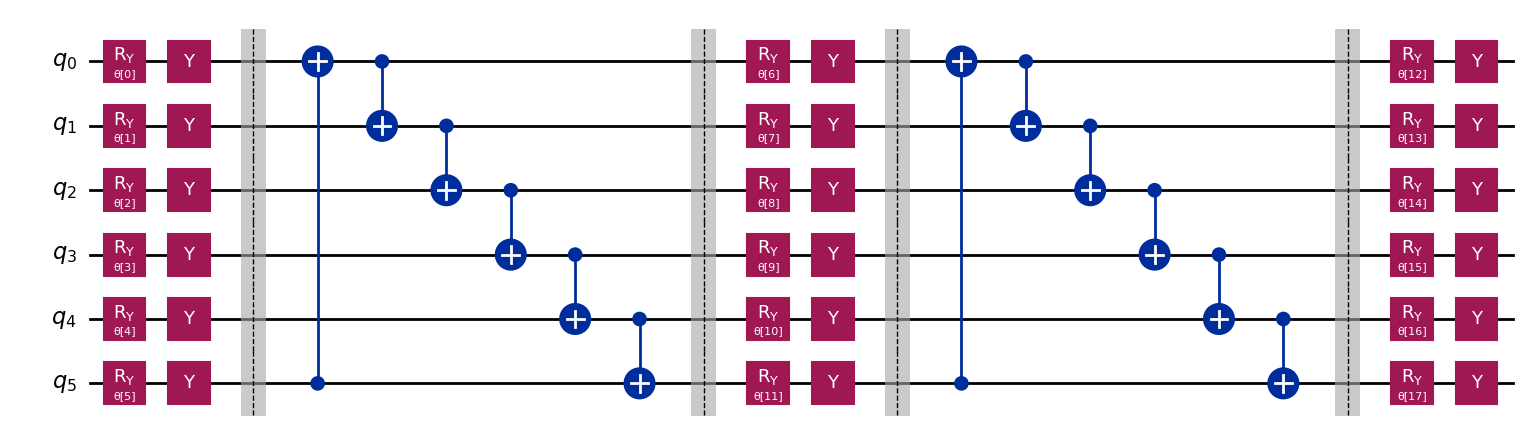

In [8]:
effsu2[3].decompose().draw(output='mpl')

# QVE

## COBYLA: EffSU2

In [9]:
res_list = []
for i in range(len(effsu2)):
    print(f'At step {i} with {effsu2_names[i]}')
    qve = QVE(COBYLA, effsu2[i], H4q, iterations_=300)
    result = qve.run_qve_w_specified_optimizer()
    print(f'Length of this optimization {len(qve.values)} \n')
    res_list.append(pd.DataFrame({effsu2_names[i]:qve.values}))
    
df1 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df1.to_csv('results/qve_l2_l2.0_effsu2_2f_cobyla.csv')

At step 0 with ansatz_0a_su2_2f
VQE result: 4.46875
Length of this optimization 214 

At step 1 with ansatz_0b_su2_2f
VQE result: 4.49805
Length of this optimization 109 

At step 2 with ansatz_0c_su2_2f
VQE result: 4.54590
Length of this optimization 300 

At step 3 with ansatz_0d_su2_2f
VQE result: 5.46875
Length of this optimization 222 

At step 4 with ansatz_1a_su2_2f
VQE result: 5.52246
Length of this optimization 177 

At step 5 with ansatz_1b_su2_2f
VQE result: 4.49805
Length of this optimization 109 

At step 6 with ansatz_1c_su2_2f
VQE result: 4.56641
Length of this optimization 300 

At step 7 with ansatz_1d_su2_2f
VQE result: 5.06152
Length of this optimization 213 



In [10]:
df1

,ansatz_0a_su2_2f,ansatz_0b_su2_2f,ansatz_0c_su2_2f,ansatz_0d_su2_2f,ansatz_1a_su2_2f,ansatz_1b_su2_2f,ansatz_1c_su2_2f,ansatz_1d_su2_2f
0,7.684570,4.498047,7.550781,7.619141,8.241211,4.498047,7.534180,7.602539
1,7.841797,4.498047,7.434570,7.601562,8.738281,4.498047,7.231445,7.008789
2,7.682617,4.498047,7.446289,7.425781,7.916016,4.498047,7.071289,7.143555
3,7.737305,4.498047,7.639648,7.605469,7.708984,4.498047,6.909180,6.616211
4,7.930664,4.498047,7.519531,7.130859,7.834961,4.498047,7.086914,6.894531
...,...,...,...,...,...,...,...,...
295,NaN,NaN,4.566406,NaN,NaN,NaN,4.571289,NaN
296,NaN,NaN,4.645508,NaN,NaN,NaN,4.606445,NaN
297,NaN,NaN,4.594727,NaN,NaN,NaN,4.578125,NaN
298,NaN,NaN,4.587891,NaN,NaN,NaN,4.594727,NaN


## COBYLA: TwoLocal

In [11]:
res_list = []
for i in range(len(tl)):
    print(f'At step {i} with {tl_names[i]}')
    qve = QVE(COBYLA, tl[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    print(f'Length of this optimization {len(qve.values)} \n')
    res_list.append(pd.DataFrame({tl_names[i]:qve.values}))
    
df2 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df2.to_csv('results/qve_l2_l2.0_twolocal_2f_cobyla.csv')

At step 0 with ansatz_0a_2f
VQE result: 4.45703
Length of this optimization 250 

At step 1 with ansatz_0b_2f
VQE result: 4.49805
Length of this optimization 181 

At step 2 with ansatz_0c_2f
VQE result: 4.49023
Length of this optimization 250 

At step 3 with ansatz_0d_2f
VQE result: 4.40430
Length of this optimization 250 

At step 4 with ansatz_1a_2f
VQE result: 4.50000
Length of this optimization 250 

At step 5 with ansatz_1b_2f
VQE result: 4.49805
Length of this optimization 250 

At step 6 with ansatz_1c_2f
VQE result: 4.53418
Length of this optimization 250 

At step 7 with ansatz_1d_2f
VQE result: 4.44238
Length of this optimization 250 



In [12]:
df2

,ansatz_0a_2f,ansatz_0b_2f,ansatz_0c_2f,ansatz_0d_2f,ansatz_1a_2f,ansatz_1b_2f,ansatz_1c_2f,ansatz_1d_2f
0,6.158203,4.498047,6.738281,8.954102,7.215820,4.498047,7.568359,8.186523
1,5.965820,4.498047,6.435547,8.912109,7.710938,4.498047,7.596680,7.745117
2,6.009766,4.498047,6.398438,8.432617,6.768555,4.498047,7.527344,7.431641
3,6.039062,4.498047,6.670898,8.762695,7.250977,4.498047,7.398438,7.576172
4,5.891602,4.498047,6.335938,8.881836,7.159180,4.498047,7.110352,7.245117
...,...,...,...,...,...,...,...,...
245,4.462891,NaN,4.505859,4.412109,4.527344,4.498047,4.617188,4.478516
246,4.464844,NaN,4.503906,4.408203,4.519531,4.498047,4.666992,4.479492
247,4.457031,NaN,4.511719,4.412109,4.544922,4.498047,4.564453,4.457031
248,4.460938,NaN,4.517578,4.408203,4.523438,4.498047,4.614258,4.489258


## SPSA

In [13]:
res_list = []
for i in range(len(effsu2)):
    print(f'At step {i} with {effsu2_names[i]}')
    qve = QVE(SPSA, effsu2[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    res_list.append(pd.DataFrame({effsu2_names[i]:qve.values}))
    
df4 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df4.to_csv('results/qve_l2_l2.0_effsu2_2f_spsa.csv')

At step 0 with ansatz_0a_su2_2f
VQE result: 4.60547
At step 1 with ansatz_0b_su2_2f
VQE result: 4.49805
At step 2 with ansatz_0c_su2_2f
VQE result: 4.53125
At step 3 with ansatz_0d_su2_2f
VQE result: 4.53418
At step 4 with ansatz_1a_su2_2f
VQE result: 4.52051
At step 5 with ansatz_1b_su2_2f
VQE result: 4.49805
At step 6 with ansatz_1c_su2_2f
VQE result: 4.48828
At step 7 with ansatz_1d_su2_2f
VQE result: 4.54102


In [14]:
df4

,ansatz_0a_su2_2f,ansatz_0b_su2_2f,ansatz_0c_su2_2f,ansatz_0d_su2_2f,ansatz_1a_su2_2f,ansatz_1b_su2_2f,ansatz_1c_su2_2f,ansatz_1d_su2_2f
0,7.645508,4.498047,7.394531,7.545898,8.411133,4.498047,7.536133,7.610352
1,7.708984,4.503906,7.760742,7.689453,8.179688,4.503906,7.566406,7.455078
2,7.595703,4.507812,7.398438,7.428711,8.064453,4.507812,7.581055,7.564453
3,7.682617,4.486328,7.518555,7.626953,8.303711,4.486328,7.409180,7.654297
4,7.800781,4.476562,7.543945,8.033203,8.903320,4.476562,7.786133,7.288086
...,...,...,...,...,...,...,...,...
546,4.747070,4.498047,4.747070,4.625000,4.656250,4.498047,4.614258,4.688477
547,4.697266,4.503906,4.661133,4.629883,4.559570,4.503906,4.612305,4.617188
548,4.830078,4.498047,4.622070,4.670898,4.642578,4.498047,4.642578,4.621094
549,4.660156,4.503906,4.748047,4.602539,4.569336,4.503906,4.573242,4.575195


In [15]:
res_list = []
for i in range(len(tl)):
    print(f'At step {i} with {tl_names[i]}')
    qve = QVE(SPSA, tl[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    res_list.append(pd.DataFrame({tl_names[i]:qve.values}))
    
df3 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df3.to_csv('results/qve_l2_l2.0_twolocal_2f_spsa.csv')


At step 0 with ansatz_0a_2f
VQE result: 4.49219
At step 1 with ansatz_0b_2f
VQE result: 4.49805
At step 2 with ansatz_0c_2f
VQE result: 4.51855
At step 3 with ansatz_0d_2f
VQE result: 4.48340
At step 4 with ansatz_1a_2f
VQE result: 4.47656
At step 5 with ansatz_1b_2f
VQE result: 4.49805
At step 6 with ansatz_1c_2f
VQE result: 4.51660
At step 7 with ansatz_1d_2f
VQE result: 4.50977


In [16]:
df3

,ansatz_0a_2f,ansatz_0b_2f,ansatz_0c_2f,ansatz_0d_2f,ansatz_1a_2f,ansatz_1b_2f,ansatz_1c_2f,ansatz_1d_2f
0,6.620117,4.498047,6.829102,8.548828,7.177734,4.498047,7.753906,8.311523
1,5.803711,4.503906,6.953125,9.307617,7.256836,4.503906,7.356445,8.100586
2,5.762695,4.507812,6.614258,9.299805,7.225586,4.507812,7.202148,8.279297
3,6.619141,4.486328,7.115234,8.543945,7.311523,4.486328,7.917969,7.942383
4,6.172852,4.476562,7.075195,8.776367,7.212891,4.476562,7.454102,8.314453
...,...,...,...,...,...,...,...,...
546,4.571289,4.498047,4.648438,4.565430,4.582031,4.498047,4.553711,4.568359
547,4.589844,4.503906,4.605469,4.557617,4.521484,4.503906,4.546875,4.499023
548,4.633789,4.498047,4.569336,4.580078,4.537109,4.498047,4.553711,4.544922
549,4.617188,4.503906,4.607422,4.556641,4.548828,4.503906,4.543945,4.537109
